<a id="TableOfContents"></a>
# TABLE OF CONTENTS:
<li><a href='#imports'>Imports</a></li>
<li><a href="#Q1">Question 1</a></li>
<li><a href="#Q2">Question 2</a></li>
<li><a href="#Q3">Question 3</a></li>
<li><a href="#Q4">Question 4</a></li>
<li><a href="#Q5">Question 5</a></li>
<li><a href="#Q6">Question 6</a></li>
<li><a href="#Q7">Question 7</a></li>
<li><a href="#Bonus1">Bonus-1</a></li>
<li><a href="#Bonus2">Bonus-2</a></li>

<a id='imports'></a>
# IMPORTS:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Basic sheiza
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Stats/Explore
from scipy import stats

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# .py file(s)
import acquire
import prepare
import explore
import evaluation

Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

In [2]:
# Acquire titanic dataframe
titanic = prepare.prep_titanic()
titanic.sample()

,survived,pclass,sex,age,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
571,1,1,female,53.0,51.4792,Southampton,0,1,0,0,0,1


In [3]:
# Identify y_cols
y_titanic = 'survived'

In [4]:
# Identify x_cols
x_titanic = titanic.columns.to_list()
x_titanic = [col for col in x_titanic if col not in ['survived', 'sex', 'embark_town']]
x_titanic

['pclass',
 'age',
 'fare',
 'alone',
 'sex_female',
 'sex_male',
 'embark_town_Cherbourg',
 'embark_town_Queenstown',
 'embark_town_Southampton']

In [5]:
# split data and stratify on survived
titanic_train, titanic_validate, titanic_test = prepare.split(titanic)

What column do you want to stratify onsurvived
train.shape:(498, 12)
validate.shape:(214, 12)
test.shape:(179, 12)


In [6]:
# Verify split shapes
titanic_train.shape, titanic_validate.shape, titanic_test.shape

((498, 12), (214, 12), (179, 12))

<a id='Q1'></a>
### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [7]:
# titanic models sets
titanic_models = titanic_train['survived']
titanic_models = pd.DataFrame(titanic_models)
titanic_models = titanic_models.rename(columns={'survived' : 'actual'})
titanic_models

,actual
474,0
370,1
573,1
110,0
167,0
...,...
735,0
163,0
770,0
196,0


In [8]:
# Baseline is '0' or 'DID NOT survive'
titanic.survived.value_counts()
titanic_models['baseline'] = 0

In [9]:
# baseline accuracy is 61.62%
evaluation.accuracy(titanic_models, 'actual')

actual: 100.00%

baseline: 61.65%

HIGHEST VALUE = baseline: 61.65%
LOWEST VALUE = baseline: 61.65%


<a id='Q2'></a>
### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [10]:
titanic_train[x_titanic]

,pclass,age,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
474,3,22.000000,9.8375,1,1,0,0,0,1
370,1,25.000000,55.4417,0,0,1,1,0,0
573,3,29.699118,7.7500,1,1,0,0,1,0
110,1,47.000000,52.0000,1,0,1,0,0,1
167,3,45.000000,27.9000,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
735,3,28.500000,16.1000,1,0,1,0,0,1
163,3,17.000000,8.6625,1,0,1,0,0,1
770,3,24.000000,9.5000,1,0,1,0,0,1
196,3,29.699118,7.7500,1,0,1,0,1,0


In [11]:
# Create 1st model as decision tree
clf1 = DecisionTreeClassifier()
clf1.fit(titanic_train[x_titanic], titanic_train[y_titanic])
model1_dt = clf1.predict(titanic_train[x_titanic])
titanic_models['model1_dt'] = model1_dt

<a id='Q3'></a>
### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [12]:
clf1_score = clf1.score(titanic_train[x_titanic], titanic_train[y_titanic])
clf1_confusion_matrix = confusion_matrix(titanic_models.actual, model1_dt)
clf1_class_report = classification_report(titanic_models.actual, model1_dt)
print(f'clf1 score:\n{clf1_score}\n')
print(f'clf1 confusion matrix:\n{clf1_confusion_matrix}\n')
print(f'clf1 classification report:\n{clf1_class_report}')

clf1 score:
0.9839357429718876

clf1 confusion matrix:
[[306   1]
 [  7 184]]

clf1 classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       307
           1       0.99      0.96      0.98       191

    accuracy                           0.98       498
   macro avg       0.99      0.98      0.98       498
weighted avg       0.98      0.98      0.98       498



<a id='Q4'></a>
### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [13]:
# accuracy
evaluation.accuracy(titanic_models, 'actual')

actual: 100.00%

baseline: 61.65%

model1_dt: 98.39%

HIGHEST VALUE = model1_dt: 98.39%
LOWEST VALUE = baseline: 61.65%


In [30]:
# True positive rate
model1_dt_matrix = confusion_matrix(titanic_models.actual, titanic_models.model1_dt, labels=(0, 1))
round(model1_dt_matrix[1, 1] / model1_dt_matrix.sum(), 2)

0.37

In [15]:
# False Positive Rate
round(model1_dt_matrix[0, 1] / model1_dt_matrix.sum(), 2)

0.01

In [32]:
# True Negative Rate
round(model1_dt_matrix[0, 0] / model1_dt_matrix.sum(), 2)

0.61

In [33]:
# False Negative Rate
round(model1_dt_matrix[1, 0] / model1_dt_matrix.sum(), 2)

0.01

In [18]:
classification_report(titanic_models.actual, model1_dt)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       307\n           1       0.99      0.96      0.98       191\n\n    accuracy                           0.98       498\n   macro avg       0.99      0.98      0.98       498\nweighted avg       0.98      0.98      0.98       498\n'

<a id='Q5'></a>
### 5. Run through steps 2-4 using a different max_depth value.
<li><a href='#TableOfContents'>Table of Contents</a></li>

##### 5a. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

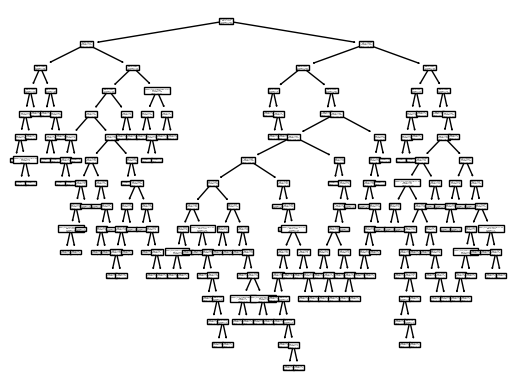

15

In [19]:
# No restricion depth = 15
plot_tree(clf1, feature_names=x_titanic)
plt.show()
clf1.tree_.max_depth

In [20]:
# Restrict from 15 to 10
clf2 = DecisionTreeClassifier(max_depth=10)
clf2.fit(titanic_train[x_titanic], titanic_train[y_titanic])
model2_dt = clf2.predict(titanic_train[x_titanic])
titanic_models['model2_dt'] = model2_dt

##### 5b. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [34]:
clf2_score = clf2.score(titanic_train[x_titanic], titanic_train[y_titanic])
clf2_confusion_matrix = confusion_matrix(titanic_models.actual, titanic_models.model2_dt, labels=(0, 1))
clf2_class_report = classification_report(titanic_models.actual, titanic_models.model2_dt)
print(f'clf2 score:\n{clf2_score}\n')
print(f'clf2 confusion matrix:\n{clf2_confusion_matrix}\n')
print(f'clf2 classification report:\n{clf2_class_report}')

clf2 score:
0.9477911646586346

clf2 confusion matrix:
[[301   6]
 [ 20 171]]

clf2 classification report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       307
           1       0.97      0.90      0.93       191

    accuracy                           0.95       498
   macro avg       0.95      0.94      0.94       498
weighted avg       0.95      0.95      0.95       498



##### 5c. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [22]:
# Accuracy, precision, recall, f-1 score, support
clf2_class_report

'              precision    recall  f1-score   support\n\n           0       0.94      0.98      0.96       307\n           1       0.97      0.90      0.93       191\n\n    accuracy                           0.95       498\n   macro avg       0.95      0.94      0.94       498\nweighted avg       0.95      0.95      0.95       498\n'

In [35]:
# True positive rate
round(clf2_confusion_matrix[1, 1] / clf2_confusion_matrix.sum(), 2)

0.34

In [36]:
# False Positive Rate
round(clf2_confusion_matrix[0, 1] / clf2_confusion_matrix.sum(), 2)

0.01

In [37]:
# True Negative Rate
round(clf2_confusion_matrix[0, 0] / clf2_confusion_matrix.sum(), 2)

0.6

In [38]:
# False Negative Rate
round(clf2_confusion_matrix[1, 0] / clf2_confusion_matrix.sum(), 2)

0.04

<a id='Q6'></a>
### 6. Which model performs better on your in-sample data?
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [27]:
evaluation.f1_score(titanic_models, 'actual', 1, 0)

actual: 100.00%

baseline: 76.27%

model1_dt: 98.71%

model2_dt: 95.86%

HIGHEST VALUE = model1_dt: 98.71%
LOWEST VALUE = baseline: 76.27%


Model-1 Performed the best (Had no restrictions)

<a id='Q7'></a>
### 7. Which model performs best on your out-of-sample data, the validate set?
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [28]:
clf1_train_score = round(clf1.score(titanic_train[x_titanic], titanic_train[y_titanic]), 2)
clf1_validate_score = round(clf1.score(titanic_validate[x_titanic], titanic_validate[y_titanic]), 2)
clf2_train_score = round(clf2.score(titanic_train[x_titanic], titanic_train[y_titanic]), 2)
clf2_validate_score = round(clf2.score(titanic_validate[x_titanic], titanic_validate[y_titanic]), 2)
print(f'clf1 Train: {clf1_train_score}\nclf1 Validate: {clf1_validate_score}\nclf2 Train: {clf2_train_score}\nclf2 Validate: {clf2_validate_score}')

clf1 Train: 0.98
clf1 Validate: 0.72
clf2 Train: 0.95
clf2 Validate: 0.73


Model-2 performed the best (Restricted depth from 15 to 10)

<a id='Bonus1'></a>
### BONUS-1. Work through these same exercises using the Telco dataset.
<li><a href='#TableOfContents'>Table of Contents</a></li>

<a id='Bonus2'></a>
### BONUS-2. Experiment with this model on other datasets with a higher number of output classes.
<li><a href='#TableOfContents'>Table of Contents</a></li>